In [713]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# upload data

In [714]:
df_0 = pd.read_csv('recidivism.csv',thousands=',')
display(df_0)

Fiscal Year Released  Recidivism Reporting Year  \
0                      2010                       2013   
1                      2010                       2013   
2                      2010                       2013   
3                      2010                       2013   
4                      2010                       2013   
...                     ...                        ...   
26015                  2015                       2018   
26016                  2015                       2018   
26017                  2015                       2018   
26018                  2015                       2018   
26019                  2015                       2018   

      Main Supervising District                        Release Type  \
0                           7JD                              Parole   
1                           NaN        Discharged – End of Sentence   
2                           5JD                              Parole   
3                           6JD                              Parole   
4                           NaN        Discharged – End of Sentence   
...                         ...                                 ...   
26015                       NaN           Paroled to Detainer - INS   
26016                       6JD        Released to Special Sentence   
26017                       5JD                      Parole Granted   
26018                       5JD       Paroled w/Immediate Discharge   
26019                       NaN  Paroled to Detainer - Out of State   

           Race - Ethnicity Age At Release      Sex  Offense Classification  \
0      Black - Non-Hispanic           25-34    Male                C Felony   
1      White - Non-Hispanic           25-34    Male                D Felony   
2      White - Non-Hispanic           35-44    Male                B Felony   
3      White - Non-Hispanic           25-34    Male                B Felony   
4      Black - Non-Hispanic           35-44    Male                D Felony   
...                     ...             ...     ...                     ...   
26015      White - Hispanic        Under 25    Male                C Felony   
26016  White - Non-Hispanic           35-44    Male                C Felony   
26017  White - Non-Hispanic           25-34  Female  Aggravated Misdemeanor   
26018  White - Non-Hispanic           25-34    Male                D Felony   
26019  White - Non-Hispanic           35-44    Male                D Felony   

       Offense Type      Offense Subtype Return to Prison  Days to Return  \
0           Violent              Robbery              Yes           433.0   
1          Property                Theft              Yes           453.0   
2              Drug          Trafficking              Yes           832.0   
3             Other       Other Criminal               No             NaN   
4           Violent              Assault              Yes           116.0   
...             ...                  ...              ...             ...   
26015       Violent              Assault               No             NaN   
26016       Violent                  Sex               No             NaN   
26017  Public Order              Traffic               No             NaN   
26018      Property                Theft               No             NaN   
26019       Violent  Murder/Manslaughter              Yes           369.0   

      Recidivism Type New Offense Classification New Offense Type  \
0                 New                   C Felony             Drug   
1                Tech                        NaN              NaN   
2                Tech                        NaN              NaN   
3       No Recidivism                        NaN              NaN   
4                Tech                        NaN              NaN   
...               ...                        ...              ...   
26015   No Recidivism                        NaN              NaN   
26016   No Recidivism          

# Data cleaning

In [715]:
#basic clean
df_1 = df_0.drop('Recidivism Reporting Year',axis=1)
df_1.rename(columns={'Fiscal Year Released':'Fiscal_Year_Released','Main Supervising District':'Main_Supervising_District','Release Type':'Release_Type','Race - Ethnicity':'Race_Ethnicity','Age At Release ':'Age_At_Release','Offense Classification':'Offense_Classification','Offense Type':'Offense_Type','Offense Subtype':'Offense_Subtype','Return to Prison':'Return_to_Prison','Days to Return':'Days_to_Return','Recidivism Type':'Recidivism_Type','New Offense Classification':'New_Offense_Classification','New Offense Type':'New_Offense_Type','New Offense Sub Type':'New_Offense_Sub_Type','Target Population':'Target_Population'},inplace= True)
df_1['Main_Supervising_District'].fillna(value='NoSup', inplace=True)
df_1['New_Offense_Classification'].fillna(value='Tech', inplace=True)
df_1['New_Offense_Type'].fillna(value='Tech', inplace=True)
df_1['New_Offense_Sub_Type'].fillna(value='Tech', inplace=True)
df_1['Race_Ethnicity'].fillna(value='Miss', inplace=True)
df_1['Sex'].fillna(value='No', inplace=True)
df_1 = df_1[df_1['Sex'] != 'No']
df_1['Release_Type'].fillna(value='No', inplace=True)
df_1 = df_1[df_1['Release_Type'] != 'No']
df_1 = df_1[df_1['Return_to_Prison'] == 'Yes']
df_1[['Fiscal_Year_Released']]=df_1[['Fiscal_Year_Released']].astype('str')

#delate outlier
df_1 = df_1[df_1['Offense_Classification'] != 'Felony - Mandatory Minimum']
df_1 = df_1[df_1['Offense_Classification'] != 'Other Felony']
df_1 = df_1[df_1['Race_Ethnicity'] != 'White -']
df_1 = df_1[df_1['Release_Type'] != 'Released to Special Sentence']
df_1 = df_1[df_1['Release_Type'] != 'Special Sentence']
df_1 = df_1[df_1['Release_Type'] != 'Paroled to Detainer - INS']
df_1 = df_1[df_1['Release_Type'] != 'Paroled to Detainer - Iowa']
df_1 = df_1[df_1['Release_Type'] != 'Paroled to Detainer - Out of State']
df_1 = df_1[df_1['Release_Type'] != 'Paroled to Detainer - U.S. Marshall']
df_1 = df_1[df_1['Release_Type'] != 'Paroled w/Immediate Discharge']
df_1 = df_1[df_1['Offense_Classification'] != 'Special Sentence 2005']
df_1 = df_1[df_1['Main_Supervising_District'] != 'Interstate Compact']
df_1 = df_1[df_1['Main_Supervising_District'] != 'ISC']
df_1 = df_1[df_1['Offense_Classification'] != 'Serious Misdemeanor']
df_1 = df_1[df_1['Offense_Classification'] != 'Felony - Enhanced']
df_1 = df_1[df_1['Offense_Classification'] != 'Felony - Enhancement to Original Penalty']
df_1 = df_1[df_1['Offense_Subtype'] != 'Animals']


#Just people who break the rules
df_tech = df_1[df_1['Recidivism_Type'] == 'Tech']

#People actually reoffend rather than break the rules
df_new = df_1[df_1['Recidivism_Type'] == 'New']


display(df_1)

Fiscal_Year_Released Main_Supervising_District  \
0                     2010                       7JD   
1                     2010                     NoSup   
2                     2010                       5JD   
4                     2010                     NoSup   
7                     2010                       6JD   
...                    ...                       ...   
25996                 2015                       8JD   
25999                 2015                       1JD   
26001                 2015                       3JD   
26007                 2015                       5JD   
26009                 2015                       5JD   

                              Release_Type  \
0                                   Parole   
1             Discharged – End of Sentence   
2                                   Parole   
4             Discharged – End of Sentence   
7                                   Parole   
...                                    ...   
25996  Discharged - Expiration of Sentence   
25999                       Parole Granted   
26001                       Parole Granted   
26007                       Parole Granted   
26009                       Parole Granted   

                                    Race_Ethnicity Age_At_Release     Sex  \
0                             Black - Non-Hispanic          25-34    Male   
1                             White - Non-Hispanic          25-34    Male   
2                             White - Non-Hispanic          35-44    Male   
4                             Black - Non-Hispanic          35-44    Male   
7                             Black - Non-Hispanic          35-44    Male   
...                                            ...            ...     ...   
25996                         White - Non-Hispanic          45-54    Male   
25999                         White - Non-Hispanic          35-44  Female   
26001  American Indian or Alaska Native - Hispanic       Under 25  Female   
26007                         Black - Non-Hispanic          25-34    Male   
26009                         White - Non-Hispanic          35-44    Male   

      Offense_Classification  Offense_Type     Offense_Subtype  \
0                   C Felony       Violent             Robbery   
1                   D Felony      Property               Theft   
2                   B Felony          Drug         Trafficking   
4                   D Felony       Violent             Assault   
7                   D Felony  Public Order                 OWI   
...                      ...           ...                 ...   
25996               D Felony  Public Order  Other Public Order   
25999               C Felony          Drug         Trafficking   
26001               C Felony          Drug         Trafficking   
26007               D Felony  Public Order       Flight/Escape   
26009               D Felony  Public Order             Weapons   

      Return_to_Prison  Days_to_Return Recidivism_Type  \
0                  Yes           433.0             New   
1                  Yes           453.0            Tech   
2                  Yes           832.0            Tech   
4                  Yes           116.0            Tech   
7                  Yes            84.0            Tech   
...                ...             ...             ...   
25996              Yes           458.0             New   
25999              Yes           707.0             New   
26001              Yes           667.0            Tech   
26007              Yes           252.0            Tech   
26009              Yes           798.0             New   

                     New_Offense_Classification New_Offense_Type  \
0                                      C Felony             Drug   
1                                          Tech             Tech   
2                                          Tech             Tech   
4                                          Tech             Tech   
7                        

# Part A Descriptive statistics

#### a) Year Released Descriptive statistics

In [716]:
df_mean_count_year = df_1.groupby(by='Fiscal_Year_Released').agg(['mean','count'])
display(df_mean_count_year)

Days_to_Return      
                               mean count
Fiscal_Year_Released                     
2010                     486.988024  1002
2011                     474.684052   997
2012                     483.009516  1261
2013                     467.946708  1276
2014                     445.927753  1135
2015                     454.881408  1307

#### b) Release Type Descriptive statistics

In [717]:
df_mean_count_release = df_1.groupby(by='Release_Type' ).agg(['mean','count'])
display(df_mean_count_release)

Days_to_Return      
                                              mean count
Release_Type                                            
Discharged - Expiration of Sentence     575.771901   605
Discharged – End of Sentence            555.238579  1182
Parole                                  441.995954  3213
Parole Granted                          426.333670  1978

#### c) Main Supervising District Descriptive statistics

In [718]:
df_mean_count_sup = df_1.groupby(by='Main_Supervising_District').agg(['mean','count'])
display(df_mean_count_sup)

Days_to_Return      
                                    mean count
Main_Supervising_District                     
1JD                           471.077838   925
2JD                           467.081991   683
3JD                           365.997449   392
4JD                           387.326613   248
5JD                           436.194415  1898
6JD                           402.953757   346
7JD                           480.278177   417
8JD                           458.787554   466
NoSup                         556.689333  1603

#### d) Race Descriptive statistics

In [719]:
df_mean_count_race = df_1.groupby(by='Race_Ethnicity').agg(['mean','count'])
display(df_mean_count_race)

Days_to_Return      
                                                          mean count
Race_Ethnicity                                                      
American Indian or Alaska Native - Hispanic         397.333333     6
American Indian or Alaska Native - Non-Hispanic     439.994012   167
Asian or Pacific Islander - Hispanic                441.000000     2
Asian or Pacific Islander - Non-Hispanic            465.605263    38
Black - Hispanic                                    427.125000     8
Black - Non-Hispanic                                493.212159  1612
White - Hispanic                                    485.599251   267
White - Non-Hispanic                                460.329438  4878

#### e) Age At Release District Descriptive statistics

In [720]:
df_mean_count_age = df_1.groupby(by='Age_At_Release').agg(['mean','count'])

display(df_mean_count_age)

Days_to_Return      
                         mean count
Age_At_Release                     
25-34              473.959421  2834
35-44              480.067660  1611
45-54              462.518319   928
55 and Older       426.462766   188
Under 25           453.121383  1417

#### f) Sex Descriptive statistics

In [721]:
df_mean_count_sex = df_1.groupby(by='Sex').agg(['mean','count'])
display(df_mean_count_sex)

Days_to_Return      
                 mean count
Sex                        
Female     450.190476   861
Male       470.891123  6117

#### g) Offense Class Descriptive statistics

In [722]:
df_mean_count_class = df_1.groupby(by='Offense_Classification').agg(['mean','count'])
display(df_mean_count_class)

Days_to_Return      
                                 mean count
Offense_Classification                     
Aggravated Misdemeanor     500.350242  1242
B Felony                   491.064348   575
C Felony                   470.204892  2167
D Felony                   449.340013  2994

#### h) Offense Type Descriptive statistics

In [723]:
df_mean_count_type = df_1.groupby(by='Offense_Type').agg(['mean','count'])
display(df_mean_count_type)

Days_to_Return      
                       mean count
Offense_Type                     
Drug             468.485843  2437
Other            503.425532    94
Property         454.363599  2423
Public Order     460.814455   927
Violent          502.219690  1097

#### i) Offense Subtype Descriptive statistics

In [724]:
df_mean_count_subtype = df_1.groupby(by='Offense_Subtype').agg(['mean','count'])
display(df_mean_count_subtype)

Days_to_Return      
                          mean count
Offense_Subtype                     
Alcohol             464.009259   108
Arson               427.333333    39
Assault             503.760841   761
Burglary            451.965318  1038
Drug Possession     451.139410   373
...                        ...   ...
Theft               461.807783   848
Traffic             489.450000   140
Trafficking         473.429002  1993
Vandalism           506.641304    92
Weapons             478.050505    99

[24 rows x 2 columns]

#### j)Target Population Descriptive statistics

In [725]:
df_mean_count_target = df_1.groupby(by='Target_Population').agg(['mean','count'])
display(df_mean_count_target)

Days_to_Return      
                            mean count
Target_Population                     
No                    506.308454  2626
Yes                   445.424862  4352

#### k)Recidivism Type Descriptive statistics

In [726]:
df_mean_count_retype = df_1.groupby(by='Recidivism_Type').agg(['mean','count'])
display(df_mean_count_retype)

Days_to_Return      
                          mean count
Recidivism_Type                     
New                 531.599824  4553
Tech                349.559175  2425

# Part B    T-Test Analysis

In [727]:
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels
import numpy as np
from scipy import stats
import scipy.stats
import math
import random
import statistics
import scipy.stats as sp
import os
import random
import numpy as np
import pandas as pd
import patsy
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.anova import AnovaRM
from statsmodels.regression.mixed_linear_model import MixedLMResults
from scipy import stats
import seaborn as sns

#### a)  Whether there is a difference in the timing of return prison between men and women？

In [728]:
df_man = df_1[df_1['Sex'] == 'Male' ]
df_woman = df_1[df_1['Sex'] == 'Female' ]

In [729]:
group1 = df_man['Days_to_Return']
group2 = df_woman['Days_to_Return']
#find variance for each group
print(np.var(group1), np.var(group2))

77862.89708811253 81880.38880592889


In [730]:
sp.ttest_ind(a=group1, b=group2, equal_var= None)

Ttest_indResult(statistic=1.992467103995796, pvalue=0.04656605265539487)

#### As p-value smaller than alpha = 0.05, we reject the null hypothesis of the test. We dohave sufficient evidence to say that there is a difference in the timing of return prison between men and women？

#### Conduct analysis of the distribution

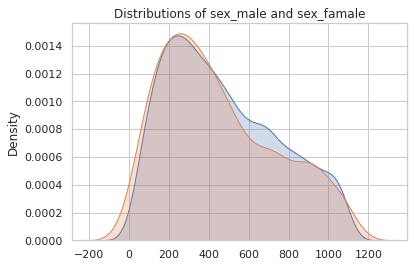

In [731]:
sex_male  = df_1[df_1['Sex'] == 'Male']['Days_to_Return'].to_list()
sex_female  = df_1[df_1['Sex'] == 'Female']['Days_to_Return'].to_list()
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(sex_male, shade=True)
sns.kdeplot(sex_female, shade=True)
plt.title("Distributions of sex_male and sex_famale")
plt.show()

#### Demonstration of a-priori Power

In [732]:
import numpy as np

#function to calculate the pooled standard deviation of 2 samples
def pooled_standard_deviation(sex_male,sex_female):
    #calculate the sample size
    n1, n2 = len(sex_male), len(sex_female)
    #calculate the variances
    var1, var2 = np.var(sex_male, ddof=1), np.var(sex_female, ddof=1)
    #calculate the pooled standard deviation
    numerator = ((n1-1) * var1) + ((n2-1) * var2)
    denominator = n1+n2-2
    return np.sqrt(numerator/denominator)

In [733]:
# function to calculate Cohen's d for independent samples
def Cohens_d(sex_male, sex_female):
    u1, u2 = np.mean(sex_male), np.mean(sex_female)
    s_pooled = pooled_standard_deviation(sex_male, sex_female)
    #print(s_pooled)
    return ((u1 - u2) / s_pooled)

In [734]:
from scipy import stats
#from statsmodels.stats.power import TTestIndPower

tStat, pValue = stats.ttest_ind(sex_male, sex_female, equal_var = False) 
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) 

P-Value:0.04656605265539487 T-Statistic:1.992467103995796


In [735]:
from statsmodels.stats.power import TTestIndPower

# parameters for power analysis
effect_size = Cohens_d(sex_male,sex_female)
alpha = 0.05
power = 0.8
ratio_ =1

print('Effect size is {0}'.format(effect_size))

analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size: %.3f' % sample_size)

Effect size is 0.07393980808476316
Sample Size: 2872.270


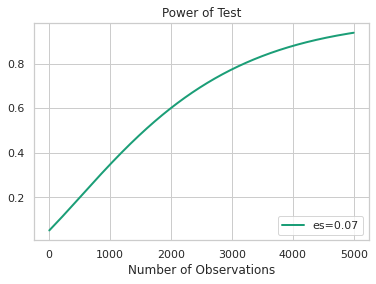

In [736]:
# calculate power curves for varying sample and effect size
from numpy import array
from matplotlib import pyplot
from statsmodels.stats.power import TTestIndPower
# parameters for power analysis
effect_sizes = array([0.07])
sample_sizes = array(range(5, 5000))
# calculate power curves from multiple power analyses
analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
pyplot.show()

#### b)Whether there is a difference in the timing of return prison between Target or not？

In [737]:
df_tye = df_1[df_1['Target_Population'] == 'Yes' ]
df_tno = df_1[df_1['Target_Population'] == 'No' ]

In [738]:
group1 = df_tye['Days_to_Return']
group2 = df_tno['Days_to_Return']
#find variance for each group
print(np.var(group1), np.var(group2))

76619.61062268319 79051.91856524104


In [739]:
sp.ttest_ind(a=group2, b=group1, equal_var= None)

Ttest_indResult(statistic=8.813101854309386, pvalue=1.6112797457368367e-18)

As p-value smaller than alpha = 0.05, we reject the null hypothesis of the test. We do have sufficient evidence to say that there is a difference in the timing of return prison between Target or not？

#### Conduct analysis of the distribution

In [740]:
target_yes  = df_1[df_1['Target_Population'] == 'Yes']['Days_to_Return'].to_list()
target_no  = df_1[df_1['Target_Population'] == 'No']['Days_to_Return'].to_list()

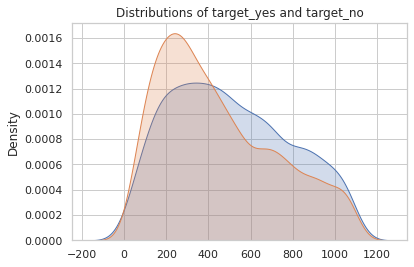

In [741]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(target_no, shade=True)
sns.kdeplot(target_yes, shade=True)
plt.title("Distributions of target_yes and target_no")
plt.show()

#### Demonstration of a-priori Power

In [742]:
from scipy import stats
#from statsmodels.stats.power import TTestIndPower

tStat, pValue = stats.ttest_ind(target_no, target_yes, equal_var = False) 
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) 

P-Value:1.6112797457368367e-18 T-Statistic:8.813101854309386


In [743]:
from statsmodels.stats.power import TTestIndPower

# parameters for power analysis
effect_size = Cohens_d(target_no,target_yes)
alpha = 0.05
power = 0.8
ratio_ =1

print('Effect size is {0}'.format(effect_size))

analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size: %.3f' % sample_size)

Effect size is 0.2186196840302084
Sample Size: 329.405


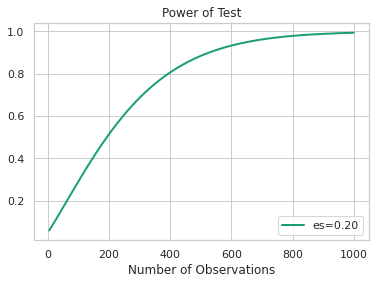

In [744]:
# calculate power curves for varying sample and effect size
from numpy import array
from matplotlib import pyplot
from statsmodels.stats.power import TTestIndPower
# parameters for power analysis
effect_sizes = array([0.2])
sample_sizes = array(range(5, 1000))
# calculate power curves from multiple power analyses
analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
pyplot.show()

### c) Whether there is a difference in the timing of return prison between Recidivism Type？

In [745]:
df_new = df_1[df_1['Recidivism_Type'] == 'New' ]
df_tech = df_1[df_1['Recidivism_Type'] == 'Tech' ]

In [746]:
group1 = df_new['Days_to_Return']
group2 = df_tech['Days_to_Return']
#find variance for each group
print(np.var(group1), np.var(group2))

77117.65931909937 59199.51247767031


In [747]:
sp.ttest_ind(a=group1, b=group2, equal_var= None)

Ttest_indResult(statistic=28.30469801241738, pvalue=1.0084686515193256e-164)

#### AS p-value smaller than alpha = 0.05, we reject the null hypothesis of the test. We do have sufficient evidence to say that there is a difference in the timing of return prison between Recidivism Type？

#### Conduct analysis of the distribution

In [748]:
#Recidivism Type New 
recidivism_new  = df_1[df_1['Recidivism_Type'] == 'New']['Days_to_Return'].to_list()
#Recidivism Type Tech
recidivism_tech  = df_1[df_1['Recidivism_Type'] == 'Tech']['Days_to_Return'].to_list()

In [749]:
# function to calculate Cohen's d for independent samples
def Cohens_d(recidivism_new, recidivism_tech):
    u1, u2 = np.mean(recidivism_new), np.mean(recidivism_tech)
    s_pooled = pooled_standard_deviation(recidivism_new,recidivism_tech)
    #print(s_pooled)
    return ((u1 - u2) / s_pooled)

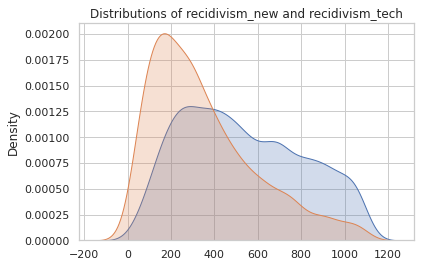

In [750]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(recidivism_new, shade=True)
sns.kdeplot(recidivism_tech, shade=True)
plt.title("Distributions of recidivism_new and recidivism_tech")
plt.show()

### Demonstration of a-priori Power

In [751]:
from scipy import stats
#from statsmodels.stats.power import TTestIndPower

tStat, pValue = stats.ttest_ind(recidivism_new, recidivism_tech, equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic

P-Value:1.0084686515193256e-164 T-Statistic:28.30469801241738


In [752]:
from statsmodels.stats.power import TTestIndPower

# parameters for power analysis
effect_size = Cohens_d(recidivism_new,recidivism_tech)
alpha = 0.05
power = 0.8
ratio_ =1

print('Effect size is {0}'.format(effect_size))

analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size: %.3f' % sample_size)

Effect size is 0.6836147133839303
Sample Size: 34.577


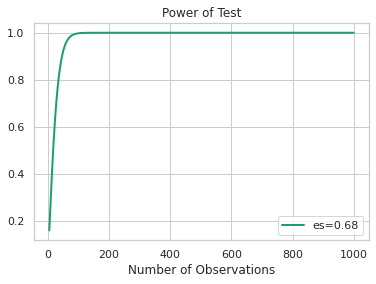

In [753]:
# calculate power curves for varying sample and effect size
from numpy import array
from matplotlib import pyplot
from statsmodels.stats.power import TTestIndPower
# parameters for power analysis
effect_sizes = array([0.68])
sample_sizes = array(range(5, 1000))
# calculate power curves from multiple power analyses
analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
pyplot.show()

# PartC One way Anova test

In [754]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

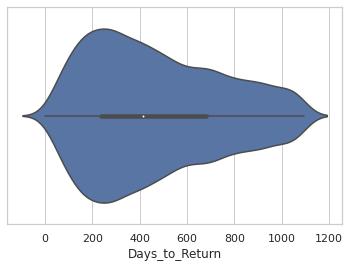

In [755]:
import seaborn as sns
sns.set_theme(style="whitegrid")

ax = sns.violinplot(x=df_1["Days_to_Return"])

#### a)Whether there is a difference in the timing of return prison between Fiscal year released？

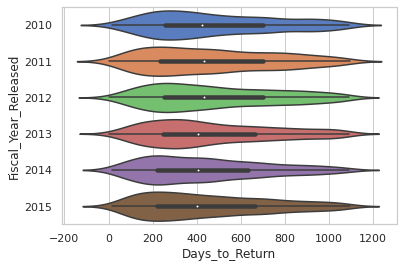

In [756]:
ax = sns.violinplot(x="Days_to_Return", y="Fiscal_Year_Released",
                    data=df_1, palette="muted",  scale="width")

In [757]:
mod = ols('Days_to_Return ~ Fiscal_Year_Released',data = df_1).fit()
aov = sm.stats.anova_lm(mod, type=2)
print(aov)

                          df        sum_sq        mean_sq         F    PR(>F)
Fiscal_Year_Released     5.0  1.466991e+06  293398.124351  3.748921  0.002164
Residual              6972.0  5.456428e+08   78262.018687       NaN       NaN


#### b)Whether there is a difference in the timing of return prison between Release_Type？

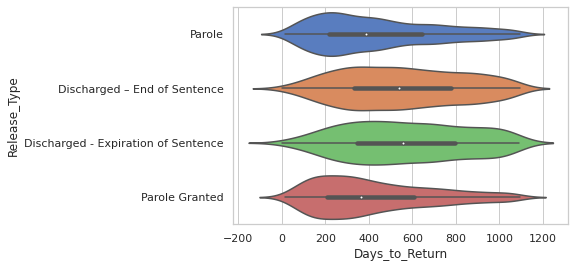

In [758]:
ax = sns.violinplot(x="Days_to_Return", y="Release_Type",
                    data=df_1, palette="muted",  scale="width")

In [759]:
mod = ols('Days_to_Return ~ Release_Type',data = df_1).fit()
aov = sm.stats.anova_lm(mod, type=2)
print(aov)

                  df        sum_sq       mean_sq          F        PR(>F)
Release_Type     3.0  2.162848e+07  7.209494e+06  95.681822  1.099477e-60
Residual      6974.0  5.254813e+08  7.534862e+04        NaN           NaN


#### c)Whether there is a difference in the timing of return prison between Main_Supervising_District？

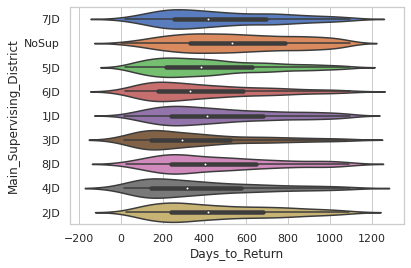

In [760]:
ax = sns.violinplot(x="Days_to_Return", y="Main_Supervising_District",
                    data=df_1, palette="muted",  scale="width")

In [761]:
mod = ols('Days_to_Return ~ Main_Supervising_District',data = df_1).fit()
aov = sm.stats.anova_lm(mod, type=2)
print(aov)

                               df        sum_sq       mean_sq          F  \
Main_Supervising_District     8.0  2.179638e+07  2.724547e+06  36.144838   
Residual                   6969.0  5.253134e+08  7.537859e+04        NaN   

                                 PR(>F)  
Main_Supervising_District  1.369841e-56  
Residual                            NaN  


#### d)Whether there is a difference in the timing of return prison between Race_Ethnicity？

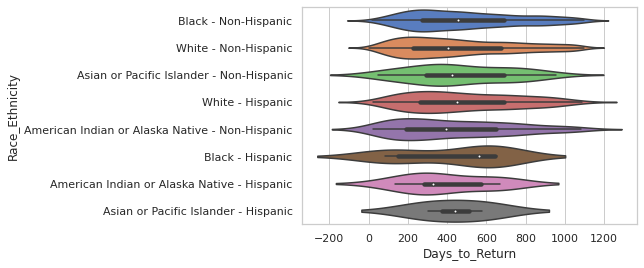

In [762]:
ax = sns.violinplot(x="Days_to_Return", y="Race_Ethnicity",
                    data=df_1, palette="muted",  scale="width")

In [763]:
mod = ols('Days_to_Return ~ Race_Ethnicity',data = df_1).fit()
aov = sm.stats.anova_lm(mod, type=2)
print(aov)

                    df        sum_sq        mean_sq         F    PR(>F)
Race_Ethnicity     7.0  1.569577e+06  224225.353563  2.864776  0.005501
Residual        6970.0  5.455402e+08   78269.757164       NaN       NaN


#### e)Whether there is a difference in the timing of return prison between Age_At_Release？

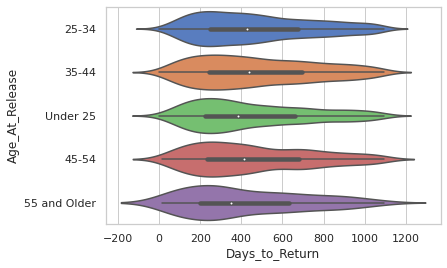

In [764]:
ax = sns.violinplot(x="Days_to_Return", y="Age_At_Release",
                    data=df_1, palette="muted",  scale="width")

In [765]:
mod = ols('Days_to_Return ~ Age_At_Release',data = df_1).fit()
aov = sm.stats.anova_lm(mod, type=2)
print(aov)

                    df        sum_sq        mean_sq         F   PR(>F)
Age_At_Release     4.0  1.000399e+06  250099.850469  3.193401  0.01249
Residual        6973.0  5.461094e+08   78317.709093       NaN      NaN


#### f)Whether there is a difference in the timing of return prison between Offense_Classification？

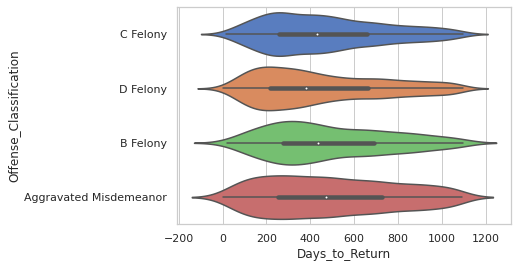

In [766]:
ax = sns.violinplot(x="Days_to_Return", y="Offense_Classification",
                    data=df_1, palette="muted",  scale="width")

In [767]:
mod = ols('Days_to_Return ~ Offense_Classification',data = df_1).fit()
aov = sm.stats.anova_lm(mod, type=2)
print(aov)

                            df        sum_sq        mean_sq          F  \
Offense_Classification     3.0  2.657919e+06  885972.917275  11.348616   
Residual                6974.0  5.444519e+08   78068.807880        NaN   

                              PR(>F)  
Offense_Classification  2.014743e-07  
Residual                         NaN  


#### g)Whether there is a difference in the timing of return prison between Offense_Type？

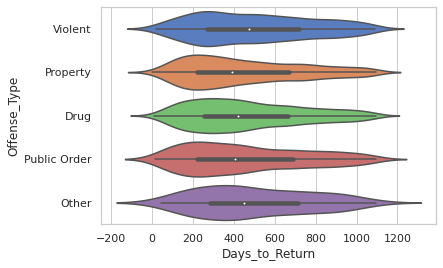

In [768]:
ax = sns.violinplot(x="Days_to_Return", y="Offense_Type",
                    data=df_1, palette="muted",  scale="width")

In [769]:
mod = ols('Days_to_Return ~ Offense_Type',data = df_1).fit()
aov = sm.stats.anova_lm(mod, type=2)
print(aov)

                  df        sum_sq        mean_sq         F   PR(>F)
Offense_Type     4.0  1.900746e+06  475186.589926  6.077442  0.00007
Residual      6973.0  5.452090e+08   78188.590069       NaN      NaN


#### h)Whether there is a difference in the timing of return prison between Offense_Subtype？

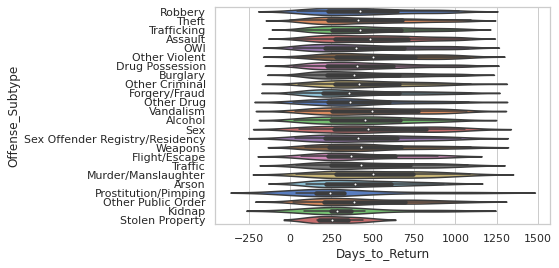

In [770]:
ax = sns.violinplot(x="Days_to_Return", y="Offense_Subtype",
                    data=df_1, palette="muted",  scale="width")

In [771]:
mod = ols('Days_to_Return ~ Offense_Subtype',data = df_1).fit()
aov = sm.stats.anova_lm(mod, type=2)
print(aov)

                     df        sum_sq        mean_sq         F    PR(>F)
Offense_Subtype    23.0  3.785956e+06  164606.775563  2.106802  0.001504
Residual         6954.0  5.433238e+08   78131.122961       NaN       NaN


# Part D Linear regressions & Anova Analysis

In [772]:
# Conduct a Post Hoc test in Anova
!pip install scikit_posthocs
import statsmodels.api as sa
import statsmodels.formula.api as sfa
import scikit_posthocs as sp

#### a)Fiscal_Year_Released linear regressions

In [773]:
# fit model to data to obtain parameter estimates
my_model_fit = smf.ols(formula='Days_to_Return ~ Fiscal_Year_Released', data=df_1).fit()
# print summary of linear regression
print(my_model_fit.summary())
# show anova table
print(sm.stats.anova_lm(my_model_fit, typ=2))

                            OLS Regression Results                            
Dep. Variable:         Days_to_Return   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.749
Date:                Thu, 08 Apr 2021   Prob (F-statistic):            0.00216
Time:                        16:06:32   Log-Likelihood:                -49212.
No. Observations:                6978   AIC:                         9.844e+04
Df Residuals:                    6972   BIC:                         9.848e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

#### Conduct a Post Hoc test in Anova

In [774]:
sp.posthoc_ttest(df_1, val_col='Days_to_Return', group_col='Fiscal_Year_Released', p_adjust='holm')

2010      2011      2012      2013      2014      2015
2010  1.000000  1.000000  1.000000  0.863477  0.009723  0.084580
2011  1.000000  1.000000  1.000000  1.000000  0.190592  0.850624
2012  1.000000  1.000000  1.000000  1.000000  0.015363  0.133176
2013  0.863477  1.000000  1.000000  1.000000  0.499187  1.000000
2014  0.009723  0.190592  0.015363  0.499187  1.000000  1.000000
2015  0.084580  0.850624  0.133176  1.000000  1.000000  1.000000

#### b)Release_Type linear regressions

In [775]:
# fit model to data to obtain parameter estimates
my_model_fit = smf.ols(formula='Days_to_Return ~ Release_Type', data=df_1).fit()
# print summary of linear regression
print(my_model_fit.summary())
# show anova table
print(sm.stats.anova_lm(my_model_fit, typ=2))

                            OLS Regression Results                            
Dep. Variable:         Days_to_Return   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     95.68
Date:                Thu, 08 Apr 2021   Prob (F-statistic):           1.10e-60
Time:                        16:06:33   Log-Likelihood:                -49080.
No. Observations:                6978   AIC:                         9.817e+04
Df Residuals:                    6974   BIC:                         9.820e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

#### Conduct a Post Hoc test in Anova

In [776]:
sp.posthoc_ttest(df_1, val_col='Days_to_Return', group_col='Release_Type', p_adjust='holm')

Parole  \
Parole                               1.000000e+00   
Discharged – End of Sentence         3.542361e-32   
Discharged - Expiration of Sentence  8.996638e-27   
Parole Granted                       9.106998e-02   

                                     Discharged – End of Sentence  \
Parole                                               3.542361e-32   
Discharged – End of Sentence                         1.000000e+00   
Discharged - Expiration of Sentence                  1.368180e-01   
Parole Granted                                       1.846627e-36   

                                     Discharged - Expiration of Sentence  \
Parole                                                      8.996638e-27   
Discharged – End of Sentence                                1.368180e-01   
Discharged - Expiration of Sentence                         1.000000e+00   
Parole Granted                                              4.780362e-31   

                                     Parole Granted  
Parole                                 9.106998e-02  
Discharged – End of Sentence           1.846627e-36  
Discharged - Expiration of Sentence    4.780362e-31  
Parole Granted                         1.000000e+00

#### c)Main_Supervising_District linear regressions

In [777]:
# fit model to data to obtain parameter estimates
my_model_fit = smf.ols(formula='Days_to_Return ~ Main_Supervising_District', data=df_1).fit()
# print summary of linear regression
print(my_model_fit.summary())
# show anova table
print(sm.stats.anova_lm(my_model_fit, typ=2))

                            OLS Regression Results                            
Dep. Variable:         Days_to_Return   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     36.14
Date:                Thu, 08 Apr 2021   Prob (F-statistic):           1.37e-56
Time:                        16:06:33   Log-Likelihood:                -49079.
No. Observations:                6978   AIC:                         9.818e+04
Df Residuals:                    6969   BIC:                         9.824e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

#### Conduct a Post Hoc test in Anova

In [778]:
sp.posthoc_ttest(df_1, val_col='Days_to_Return', group_col='Main_Supervising_District', p_adjust='holm')

7JD         NoSup           5JD           6JD           1JD  \
7JD    1.000000e+00  1.391070e-05  3.715172e-02  2.083045e-03  1.000000e+00   
NoSup  1.391070e-05  1.000000e+00  1.849548e-36  5.040100e-19  3.794613e-12   
5JD    3.715172e-02  1.849548e-36  1.000000e+00  3.766540e-01  2.221887e-02   
6JD    2.083045e-03  5.040100e-19  3.766540e-01  1.000000e+00  2.083045e-03   
1JD    1.000000e+00  3.794613e-12  2.221887e-02  2.083045e-03  1.000000e+00   
3JD    1.394315e-07  1.289789e-31  6.796881e-05  6.727476e-01  1.486135e-08   
8JD    1.000000e+00  7.592247e-10  9.516701e-01  5.973102e-02  1.000000e+00   
4JD    7.108319e-04  3.246260e-17  9.576258e-02  1.000000e+00  7.108319e-04   
2JD    1.000000e+00  5.877861e-11  1.260824e-01  7.446718e-03  1.000000e+00   

                3JD           8JD           4JD           2JD  
7JD    1.394315e-07  1.000000e+00  7.108319e-04  1.000000e+00  
NoSup  1.289789e-31  7.592247e-10  3.246260e-17  5.877861e-11  
5JD    6.796881e-05  9.516701e-01  9.576258e-02  1.260824e-01  
6JD    6.727476e-01  5.973102e-02  1.000000e+00  7.446718e-03  
1JD    1.486135e-08  1.000000e+00  7.108319e-04  1.000000e+00  
3JD    1.000000e+00  3.073691e-05  1.000000e+00  2.767381e-07  
8JD    3.073691e-05  1.000000e+00  2.029227e-02  1.000000e+00  
4JD    1.000000e+00  2.029227e-02  1.000000e+00  2.222312e-03  
2JD    2.767381e-07  1.000000e+00  2.222312e-03  1.000000e+00

#### d)Race_Ethnicity linear regressions

In [779]:
# fit model to data to obtain parameter estimates
my_model_fit = smf.ols(formula='Days_to_Return ~ Race_Ethnicity', data=df_1).fit()
# print summary of linear regression
print(my_model_fit.summary())
# show anova table
print(sm.stats.anova_lm(my_model_fit, typ=2))

                            OLS Regression Results                            
Dep. Variable:         Days_to_Return   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.865
Date:                Thu, 08 Apr 2021   Prob (F-statistic):            0.00550
Time:                        16:06:33   Log-Likelihood:                -49211.
No. Observations:                6978   AIC:                         9.844e+04
Df Residuals:                    6970   BIC:                         9.849e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

#### Conduct a Post Hoc test in Anova

In [780]:
sp.posthoc_ttest(df_1, val_col='Days_to_Return', group_col='Race_Ethnicity', p_adjust='holm')

Black - Non-Hispanic  \
Black - Non-Hispanic                                         1.000000   
White - Non-Hispanic                                         0.001249   
Asian or Pacific Islander - Non-Hispanic                     1.000000   
White - Hispanic                                             1.000000   
American Indian or Alaska Native - Non-Hispanic              0.474683   
Black - Hispanic                                             1.000000   
American Indian or Alaska Native - Hispanic                  1.000000   
Asian or Pacific Islander - Hispanic                         1.000000   

                                                 White - Non-Hispanic  \
Black - Non-Hispanic                                         0.001249   
White - Non-Hispanic                                         1.000000   
Asian or Pacific Islander - Non-Hispanic                     1.000000   
White - Hispanic                                             1.000000   
American Indian or Alaska Native - Non-Hispanic              1.000000   
Black - Hispanic                                             1.000000   
American Indian or Alaska Native - Hispanic                  1.000000   
Asian or Pacific Islander - Hispanic                         1.000000   

                                                 Asian or Pacific Islander - Non-Hispanic  \
Black - Non-Hispanic                                                                  1.0   
White - Non-Hispanic                                                                  1.0   
Asian or Pacific Islander - Non-Hispanic                                              1.0   
White - Hispanic                                                                      1.0   
American Indian or Alaska Native - Non-Hispanic                                       1.0   
Black - Hispanic                                                                      1.0   
American Indian or Alaska Native - Hispanic                                           1.0   
Asian or Pacific Islander - Hispanic                                                  1.0   

                                                 White - Hispanic  \
Black - Non-Hispanic                                          1.0   
White - Non-Hispanic                                          1.0   
Asian or Pacific Islander - Non-Hispanic                      1.0   
White - Hispanic                                              1.0   
American Indian or Alaska Native - Non-Hispanic               1.0   
Black - Hispanic                                              1.0   
American Indian or Alaska Native - Hispanic                   1.0   
Asian or Pacific Islander - Hispanic                          1.0   

                                                 American Indian or Alaska Native - Non-Hispanic  \
Black - Non-Hispanic                                                                    0.474683   
White - Non-Hispanic                                                                    1.000000   
Asian or Pacific Islander - Non-Hispanic                                                1.000000   
White - Hispanic                                                                        1.000000   
American Indian or Alaska Native - Non-Hispanic                                         1.000000   
Black - Hispanic                                                                        1.000000   
American Indian or Alaska Native - Hispanic                                             1.000000   
Asian or Pacific Islander - Hispanic                                                    1.000000   

                                                 Black - Hispanic  \
Black - Non-Hispanic                                          1.0   
White - Non-Hispanic                                          1.0   
Asian or Pacific Islander - Non-Hispanic                      1.0   
White - Hispanic                                              1.0   
American Indian or Alaska N

#### e)Age_At_Release linear regressions & Anova

In [781]:
# fit model to data to obtain parameter estimates
my_model_fit = smf.ols(formula='Days_to_Return ~ Age_At_Release', data=df_1).fit()
# print summary of linear regression
print(my_model_fit.summary())
# show anova table
print(sm.stats.anova_lm(my_model_fit, typ=2))

                            OLS Regression Results                            
Dep. Variable:         Days_to_Return   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.193
Date:                Thu, 08 Apr 2021   Prob (F-statistic):             0.0125
Time:                        16:06:34   Log-Likelihood:                -49215.
No. Observations:                6978   AIC:                         9.844e+04
Df Residuals:                    6973   BIC:                         9.847e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

#### Conduct a Post Hoc test in Anova

In [782]:
sp.posthoc_ttest(df_1, val_col='Days_to_Return', group_col='Age_At_Release', p_adjust='holm')

25-34     35-44  Under 25     45-54  55 and Older
25-34         1.000000  0.885337  0.167103  0.885337      0.167103
35-44         0.885337  1.000000  0.087706  0.676209      0.130710
Under 25      0.167103  0.087706  1.000000  0.885337      0.885337
45-54         0.885337  0.676209  0.885337  1.000000      0.676209
55 and Older  0.167103  0.130710  0.885337  0.676209      1.000000

#### f)Offense_Classification linear regressions

In [783]:
# fit model to data to obtain parameter estimates
my_model_fit = smf.ols(formula='Days_to_Return ~ Offense_Classification', data=df_1).fit()
# print summary of linear regression
print(my_model_fit.summary())
# show anova table
print(sm.stats.anova_lm(my_model_fit, typ=2))

                            OLS Regression Results                            
Dep. Variable:         Days_to_Return   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     11.35
Date:                Thu, 08 Apr 2021   Prob (F-statistic):           2.01e-07
Time:                        16:06:34   Log-Likelihood:                -49204.
No. Observations:                6978   AIC:                         9.842e+04
Df Residuals:                    6974   BIC:                         9.844e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

#### Conduct a Post Hoc test in Anova

In [784]:
sp.posthoc_ttest(df_1, val_col='Days_to_Return', group_col='Offense_Classification', p_adjust='holm')

C Felony      D Felony  B Felony  \
C Felony                1.000000  2.248082e-02  0.193119   
D Felony                0.022481  1.000000e+00  0.005776   
B Felony                0.193119  5.776328e-03  1.000000   
Aggravated Misdemeanor  0.008961  8.653065e-07  0.521897   

                        Aggravated Misdemeanor  
C Felony                          8.960924e-03  
D Felony                          8.653065e-07  
B Felony                          5.218965e-01  
Aggravated Misdemeanor            1.000000e+00

#### g)Offense_Type linear regressions

In [785]:
# fit model to data to obtain parameter estimates
my_model_fit = smf.ols(formula='Days_to_Return ~ Offense_Type', data=df_1).fit()
# print summary of linear regression
print(my_model_fit.summary())
# show anova table
print(sm.stats.anova_lm(my_model_fit, typ=2))

                            OLS Regression Results                            
Dep. Variable:         Days_to_Return   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     6.077
Date:                Thu, 08 Apr 2021   Prob (F-statistic):           7.05e-05
Time:                        16:06:35   Log-Likelihood:                -49209.
No. Observations:                6978   AIC:                         9.843e+04
Df Residuals:                    6973   BIC:                         9.846e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

#### Conduct a Post Hoc test in Anova

In [786]:
sp.posthoc_ttest(df_1, val_col='Days_to_Return', group_col='Offense_Type', p_adjust='holm')

Violent  Property      Drug  Public Order     Other
Violent       1.000000  0.000032  0.006836      0.009499  1.000000
Property      0.000032  1.000000  0.530158      1.000000  0.585407
Drug          0.006836  0.530158  1.000000      1.000000  0.888825
Public Order  0.009499  1.000000  1.000000      1.000000  0.865627
Other         1.000000  0.585407  0.888825      0.865627  1.000000

#### h)Offense_Subtype linear regressions

In [787]:
# fit model to data to obtain parameter estimates
my_model_fit = smf.ols(formula='Days_to_Return ~ Offense_Subtype', data=df_1).fit()
# print summary of linear regression
print(my_model_fit.summary())
# show anova table
print(sm.stats.anova_lm(my_model_fit, typ=2))

                            OLS Regression Results                            
Dep. Variable:         Days_to_Return   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     2.107
Date:                Thu, 08 Apr 2021   Prob (F-statistic):            0.00150
Time:                        16:06:35   Log-Likelihood:                -49197.
No. Observations:                6978   AIC:                         9.844e+04
Df Residuals:                    6954   BIC:                         9.861e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

#### Conduct a Post Hoc test in Anova

In [788]:
sp.posthoc_ttest(df_1, val_col='Days_to_Return', group_col='Offense_Subtype', p_adjust='holm')

Robbery     Theft  Trafficking   Assault  OWI  \
Robbery                   1.0  1.000000          1.0  1.000000  1.0   
Theft                     1.0  1.000000          1.0  0.786588  1.0   
Trafficking               1.0  1.000000          1.0  1.000000  1.0   
Assault                   1.0  0.786588          1.0  1.000000  1.0   
OWI                       1.0  1.000000          1.0  1.000000  1.0   
...                       ...       ...          ...       ...  ...   
Arson                     1.0  1.000000          1.0  1.000000  1.0   
Prostitution/Pimping      1.0  1.000000          1.0  1.000000  1.0   
Other Public Order        1.0  1.000000          1.0  1.000000  1.0   
Kidnap                    1.0  1.000000          1.0  1.000000  1.0   
Stolen Property           1.0  1.000000          1.0  1.000000  1.0   

                      Other Violent  Drug Possession  Burglary  \
Robbery                         1.0         1.000000  1.000000   
Theft                           1.0         1.000000  1.000000   
Trafficking                     1.0         1.000000  1.000000   
Assault                         1.0         0.776904  0.028455   
OWI                             1.0         1.000000  1.000000   
...                             ...              ...       ...   
Arson                           1.0         1.000000  1.000000   
Prostitution/Pimping            1.0         1.000000  1.000000   
Other Public Order              1.0         1.000000  1.000000   
Kidnap                          1.0         1.000000  1.000000   
Stolen Property                 1.0         1.000000  1.000000   

                      Other Criminal  Forgery/Fraud  ...  \
Robbery                          1.0       1.000000  ...   
Theft                            1.0       1.000000  ...   
Trafficking                      1.0       1.000000  ...   
Assault                          1.0       0.040334  ...   
OWI                              1.0       1.000000  ...   
...                              ...            ...  ...   
Arson                            1.0       1.000000  ...   
Prostitution/Pimping             1.0       1.000000  ...   
Other Public Order               1.0       1.000000  ...   
Kidnap                           1.0       1.000000  ...   
Stolen Property                  1.0       1.000000  ...   

                      Sex Offender Registry/Residency  Weapons  Flight/Escape  \
Robbery                                           1.0      1.0            1.0   
Theft                                             1.0      1.0            1.0   
Trafficking                                       1.0      1.0            1.0   
Assault                                           1.0      1.0            1.0   
OWI                                               1.0      1.0            1.0   
...                                               ...      ...            ...   
Arson                                             1.0      1.0            1.0   
Prostitution/Pimping                              1.0      1.0            1.0   
Other Public Order                                1.0      1.0            1.0   
Kidnap                                            1.0      1.0            1.0   
Stolen Property                                   1.0      1.0            1.0   

                      Traffic  Murder/Manslaughter  Arson  \
Robbery                   1.0                  1.0    1.0   
Theft                     1.0                  1.0    1.0   
Trafficking               1.0                  1.0    1.0   
Assault                   1.0                  1.0    1.0   
OWI                       1.0                  1.0    1.0   
...                       ...                  ...    ...   
Arson                     1.0                  1.0    1.0   
Prostitution/Pimping      1.0                  1.0    1.0   
Other Public Order        1.0                  1.0    1.0   
Kidnap                    1.0                  1.0    1.0   
Stolen Prop

#### Aggregative linear regressions

In [789]:
# fit model to data to obtain parameter estimates
my_model_fit = smf.ols(formula='Days_to_Return ~ Release_Type + Main_Supervising_District + Offense_Classification + Offense_Type', data=df_1).fit()
# print summary of linear regression
print(my_model_fit.summary())
# show anova table
print(sm.stats.anova_lm(my_model_fit, typ=2))

                            OLS Regression Results                            
Dep. Variable:         Days_to_Return   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     23.45
Date:                Thu, 08 Apr 2021   Prob (F-statistic):           6.74e-76
Time:                        16:06:35   Log-Likelihood:                -49016.
No. Observations:                6978   AIC:                         9.807e+04
Df Residuals:                    6959   BIC:                         9.820e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

# Part E Deep analysis 

### Qa  Why are observed people more likely to go back to prison?Are they more likely to reoffend, or are they more likely to break the rules ？

In [790]:
df_mean_count_subtype_target = df_1.groupby(by=['Offense_Classification','Target_Population']).agg(['mean','count'])
display(df_mean_count_subtype_target)

Days_to_Return      
                                                   mean count
Offense_Classification Target_Population                     
Aggravated Misdemeanor No                    524.096817   754
                       Yes                   463.659836   488
B Felony               No                    512.222222   117
                       Yes                   485.659389   458
C Felony               No                    498.678843   657
                       Yes                   457.815894  1510
D Felony               No                    498.028233  1098
                       Yes                   421.143987  1896

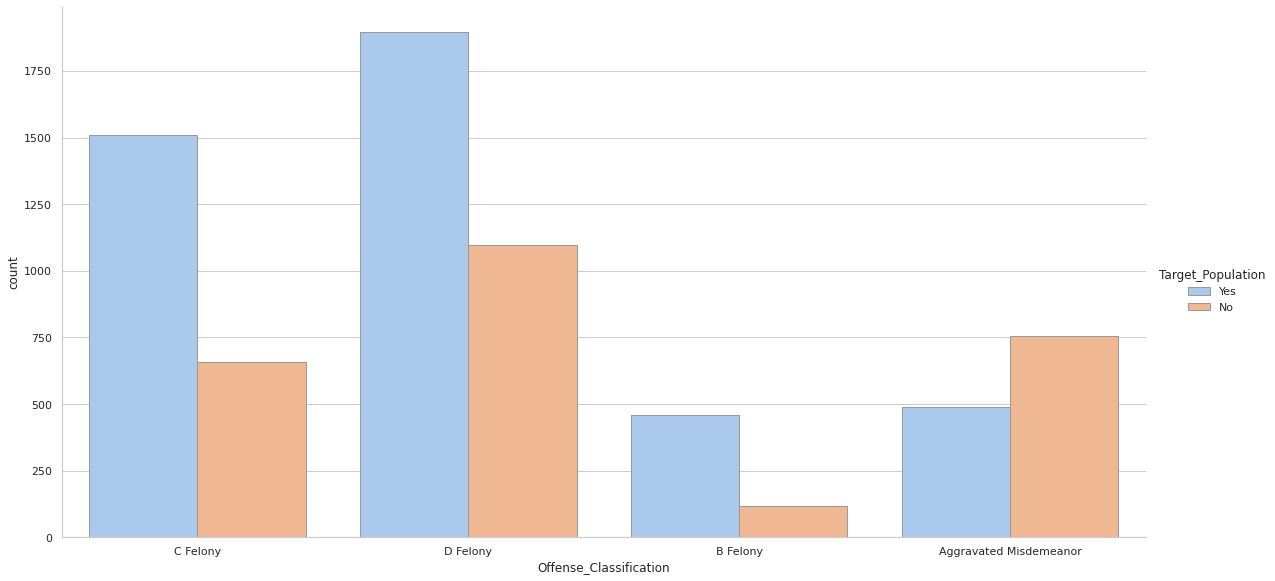

In [791]:
sns.catplot(x="Offense_Classification", hue="Target_Population", kind="count",height=8, aspect=2,
            palette="pastel", edgecolor=".6",
            data=df_1)

### chi square test 

In [792]:
from scipy import stats

table_target_class = pd.crosstab(index=df_1['Offense_Classification'],columns=df_1['Target_Population'])
display(table_target_class)


(chi2,p,dof,_) = stats.chi2_contingency([table_target_class.iloc[0].values,table_target_class.iloc[1].values])
print("chi2    : " ,chi2)
print("p-value : " ,p)
print("significance level : 0.05")

Target_Population         No   Yes
Offense_Classification            
Aggravated Misdemeanor   754   488
B Felony                 117   458
C Felony                 657  1510
D Felony                1098  1896

chi2    :  254.92391739847045
p-value :  2.1929171433804973e-57
significance level : 0.05


#### The type of surveillance being focused are felony B，C，D etc .On the other hand, misdemeanors are not monitored

Text(0, 0.5, 'Mean of Days to Return')

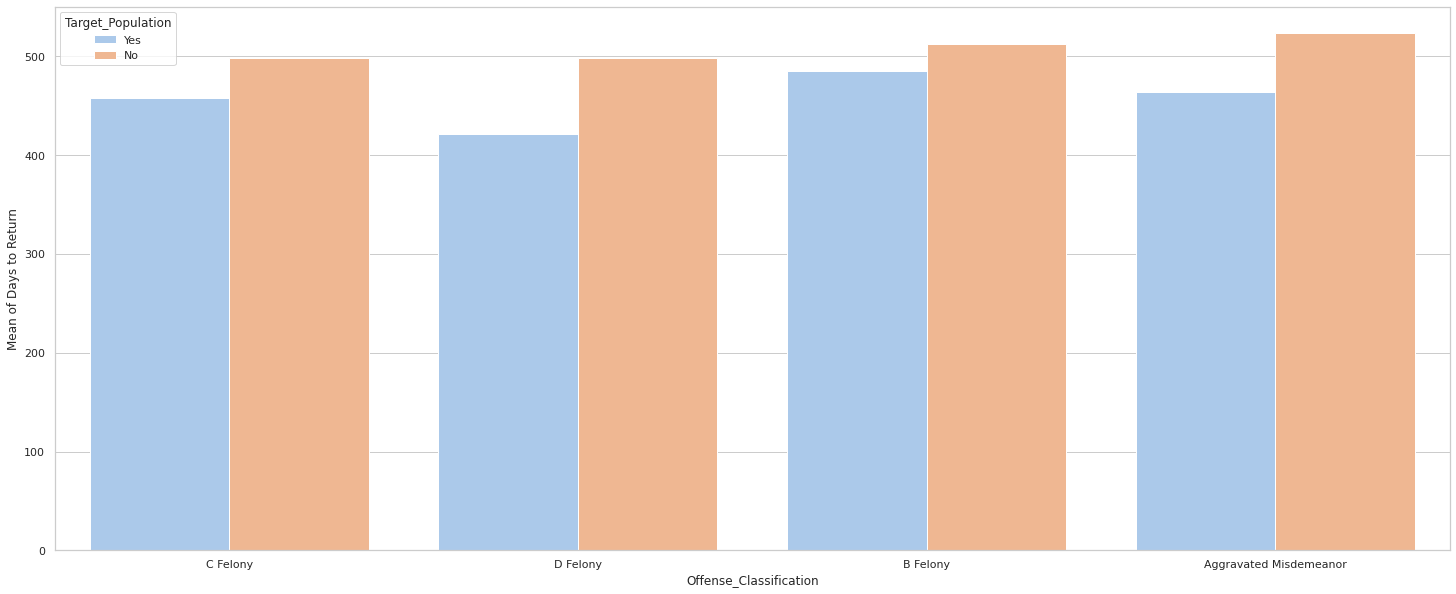

In [793]:
plt.figure(figsize=(25, 10))
sns.barplot(x="Offense_Classification",y="Days_to_Return",data=df_1, hue="Target_Population", palette="pastel", ci=0).set_ylabel('Mean of Days to Return')


#### With the exception of Serious misdemeanors, all other types of surveillance were returned to prison early

## If only people who truly re-crime

In [794]:
df_mean_count_subtype_target = df_new.groupby(by=['Offense_Classification','Target_Population']).agg(['mean','count'])
display(df_mean_count_subtype_target)

Days_to_Return      
                                                   mean count
Offense_Classification Target_Population                     
Aggravated Misdemeanor No                    545.542647   680
                       Yes                   544.623656   372
B Felony               No                    544.615385    65
                       Yes                   517.876000   250
C Felony               No                    532.273563   435
                       Yes                   513.428753   786
D Felony               No                    549.773256   860
                       Yes                   519.490498  1105

Text(0, 0.5, 'Mean of Days to Return')

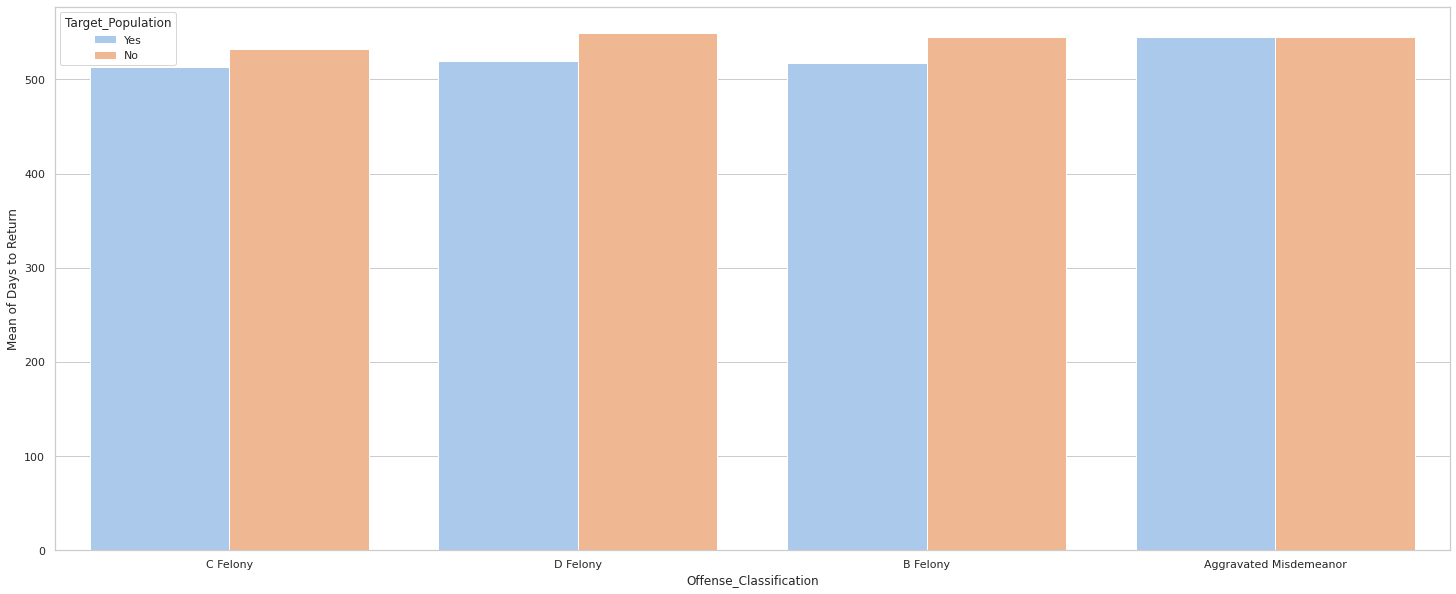

In [795]:
plt.figure(figsize=(25, 10))
sns.barplot(x="Offense_Classification",y="Days_to_Return",data=df_new, hue="Target_Population", palette="pastel", ci=0).set_ylabel('Mean of Days to Return')

### It is clear that supervision has no effect on misdemeanors，Other groups seemed to work

# TWO way ANOVA & Regression Analysis

# All

In [796]:
# fit model to data to obtain parameter estimates
my_model_fit = smf.ols(formula='Days_to_Return ~ Offense_Classification * Target_Population', data=df_1).fit()
# print summary of linear regression
print(my_model_fit.summary())
# show anova table
print(sm.stats.anova_lm(my_model_fit, typ=2))

                            OLS Regression Results                            
Dep. Variable:         Days_to_Return   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     16.05
Date:                Thu, 08 Apr 2021   Prob (F-statistic):           4.46e-21
Time:                        16:06:37   Log-Likelihood:                -49165.
No. Observations:                6978   AIC:                         9.835e+04
Df Residuals:                    6970   BIC:                         9.840e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

# New only

In [797]:
# fit model to data to obtain parameter estimates
my_model_fit = smf.ols(formula='Days_to_Return ~ Offense_Classification * Target_Population', data=df_new).fit()
# print summary of linear regression
print(my_model_fit.summary())
# show anova table
print(sm.stats.anova_lm(my_model_fit, typ=2))

                            OLS Regression Results                            
Dep. Variable:         Days_to_Return   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.779
Date:                Thu, 08 Apr 2021   Prob (F-statistic):             0.0870
Time:                        16:06:37   Log-Likelihood:                -32072.
No. Observations:                4553   AIC:                         6.416e+04
Df Residuals:                    4545   BIC:                         6.421e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

In [798]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
from scipy import stats

# Tech

In [799]:
# fit model to data to obtain parameter estimates
my_model_fit = smf.ols(formula='Days_to_Return ~ Offense_Classification * Target_Population', data=df_tech).fit()
# print summary of linear regression
print(my_model_fit.summary())
# show anova table
print(sm.stats.anova_lm(my_model_fit, typ=2))

                            OLS Regression Results                            
Dep. Variable:         Days_to_Return   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     32.13
Date:                Thu, 08 Apr 2021   Prob (F-statistic):           6.66e-43
Time:                        16:06:37   Log-Likelihood:                -16657.
No. Observations:                2425   AIC:                         3.333e+04
Df Residuals:                    2417   BIC:                         3.338e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

# All 

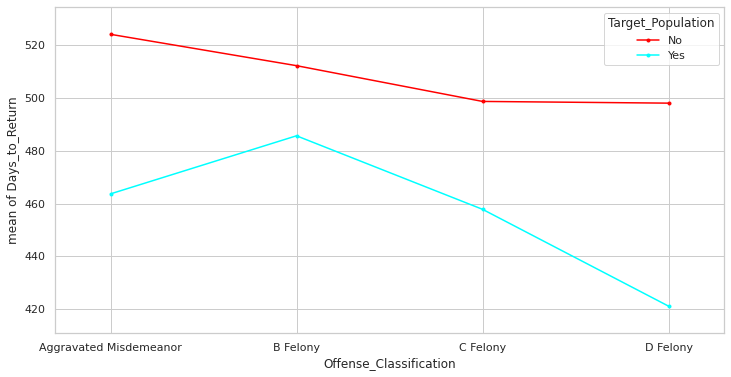

In [800]:
plt.figure(figsize=(12,6))
fig = interaction_plot(df_1.Offense_Classification,df_1.Target_Population,df_1.Days_to_Return, ax=plt.gca())
plt.show()

# new only

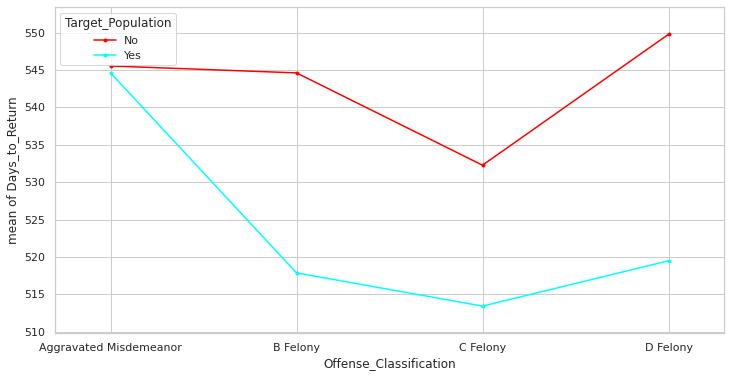

In [801]:
plt.figure(figsize=(12,6))
fig = interaction_plot(df_new.Offense_Classification,df_new.Target_Population,df_new.Days_to_Return, ax=plt.gca())
plt.show()

# tech only

In [802]:
#fix interaction_plot   index bug
adf_tech=df_tech
adf_tech.index = range(len(adf_tech))

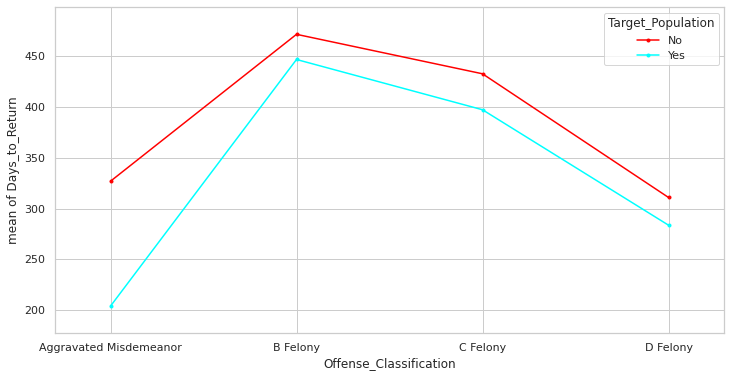

In [803]:
plt.figure(figsize=(12,6))
interaction_plot(adf_tech.Offense_Classification,adf_tech.Target_Population,adf_tech.Days_to_Return,ax=plt.gca())
plt.show()

# Factorial-experiments

# All

In [804]:
import statsmodels.stats.multicomp as mc

interaction_groups = "Offense_Classification" + df_1.Offense_Classification.astype(str) + " & " + "Target_Population" + df_1.Target_Population.astype(str)

comp = mc.MultiComparison(df_1["Days_to_Return"], interaction_groups)
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [805]:
table_int_ct = post_hoc_res.summary().as_html()
df_int_ct = pd.read_html(table_int_ct,header=0,index_col=None)[0]
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_rows', 10)
display(df_int_ct[df_int_ct['p-adj'] < 0.05])

group1  \
0   Offense_ClassificationAggravated Misdemeanor &...   
4   Offense_ClassificationAggravated Misdemeanor &...   
6   Offense_ClassificationAggravated Misdemeanor &...   
17  Offense_ClassificationB Felony & Target_Popula...   
21  Offense_ClassificationB Felony & Target_Popula...   
22  Offense_ClassificationC Felony & Target_Popula...   
24  Offense_ClassificationC Felony & Target_Popula...   
25  Offense_ClassificationC Felony & Target_Popula...   
26  Offense_ClassificationC Felony & Target_Popula...   
27  Offense_ClassificationD Felony & Target_Popula...   

                                               group2  meandiff   p-adj  \
0   Offense_ClassificationAggravated Misdemeanor &...  -60.4370  0.0045   
4   Offense_ClassificationC Felony & Target_Popula...  -66.2809  0.0010   
6   Offense_ClassificationD Felony & Target_Popula... -102.9528  0.0010   
17  Offense_ClassificationD Felony & Target_Popula...  -91.0782  0.0136   
21  Offense_ClassificationD Felony & Target_Popula...  -64.5154  0.0010   
22  Offense_ClassificationC Felony & Target_Popula...  -40.8629  0.0356   
24  Offense_ClassificationD Felony & Target_Popula...  -77.5349  0.0010   
25  Offense_ClassificationD Felony & Target_Popula...   40.2123  0.0065   
26  Offense_ClassificationD Felony & Target_Popula...  -36.6719  0.0033   
27  Offense_ClassificationD Felony & Target_Popula...  -76.8842  0.0010   

       lower    upper  reject  
0  -109.3936 -11.4803    True  
4  -103.8569 -28.7049    True  
6  -139.2326 -66.6731    True  
17 -171.3488 -10.8077    True  
21 -108.3884 -20.6424    True  
22  -80.2456  -1.4803    True  
24 -115.6827 -39.3870    True  
25    6.7920  73.6327    True  
26  -65.7363  -7.6075    True  
27 -108.8402 -44.9283    True

# New only

In [806]:
import statsmodels.stats.multicomp as mc

interaction_groups = "Offense_Classification" + df_new.Offense_Classification.astype(str) + " & " + "Target_Population" + df_new.Target_Population.astype(str)

comp = mc.MultiComparison(df_new["Days_to_Return"], interaction_groups)
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [807]:
table_int_ct = post_hoc_res.summary().as_html()
df_int_ct = pd.read_html(table_int_ct,header=0,index_col=None)[0]
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_rows', 10)
display(df_int_ct[df_int_ct['p-adj'] < 0.05])

Empty DataFrame
Columns: [group1, group2, meandiff, p-adj, lower, upper, reject]
Index: []

# Tech

In [808]:
import statsmodels.stats.multicomp as mc

interaction_groups = "Offense_Classification" + df_tech.Offense_Classification.astype(str) + " & " + "Target_Population" + df_tech.Target_Population.astype(str)

comp = mc.MultiComparison(df_tech["Days_to_Return"], interaction_groups)
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [809]:
table_int_ct = post_hoc_res.summary().as_html()
df_int_ct = pd.read_html(table_int_ct,header=0,index_col=None)[0]
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_rows', 10)
display(df_int_ct[df_int_ct['p-adj'] < 0.05])

group1  \
0   Offense_ClassificationAggravated Misdemeanor &...   
1   Offense_ClassificationAggravated Misdemeanor &...   
2   Offense_ClassificationAggravated Misdemeanor &...   
3   Offense_ClassificationAggravated Misdemeanor &...   
7   Offense_ClassificationAggravated Misdemeanor &...   
..                                                ...   
21  Offense_ClassificationB Felony & Target_Popula...   
23  Offense_ClassificationC Felony & Target_Popula...   
24  Offense_ClassificationC Felony & Target_Popula...   
25  Offense_ClassificationC Felony & Target_Popula...   
26  Offense_ClassificationC Felony & Target_Popula...   

                                               group2  meandiff   p-adj  \
0   Offense_ClassificationAggravated Misdemeanor &... -123.0098  0.0094   
1   Offense_ClassificationB Felony & Target_Popula...  144.7037  0.0142   
2   Offense_ClassificationB Felony & Target_Popula...  119.9105  0.0037   
3   Offense_ClassificationC Felony & Target_Popula...  105.8243  0.0167   
7   Offense_ClassificationB Felony & Target_Popula...  267.7135  0.0010   
..                                                ...       ...     ...   
21  Offense_ClassificationD Felony & Target_Popula... -163.1802  0.0010   
23  Offense_ClassificationD Felony & Target_Popula... -121.8009  0.0010   
24  Offense_ClassificationD Felony & Target_Popula... -149.0941  0.0010   
25  Offense_ClassificationD Felony & Target_Popula...  -86.3902  0.0010   
26  Offense_ClassificationD Felony & Target_Popula... -113.6833  0.0010   

       lower     upper  reject  
0  -228.2148  -17.8048    True  
1    16.7444  272.6631    True  
2    24.1952  215.6258    True  
3    10.9043  200.7443    True  
7   149.7009  385.7261    True  
..       ...       ...     ...  
21 -218.2822 -108.0783    True  
23 -187.7818  -55.8200    True  
24 -202.8027  -95.3854    True  
25 -139.2267  -33.5537    True  
26 -150.0542  -77.3125    True  

[18 rows x 7 columns]

#### a) T-test to prove supervision affects the time to reoffend people who was misdemeanors

In [810]:
new_mis_tyes = df_new[(df_new['Offense_Classification'] == 'Aggravated Misdemeanor') & (df_new['Target_Population'] == 'Yes')]['Days_to_Return'].to_list()
new_mis_tno = df_new[(df_new['Offense_Classification'] == 'Aggravated Misdemeanor') & (df_new['Target_Population'] == 'No')]['Days_to_Return'].to_list()
from scipy import stats
tStat, pValue = stats.ttest_ind(new_mis_tno, new_mis_tyes, equal_var = False) 
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic

P-Value:0.9597497885135708 T-Statistic:0.050483932853567566


#### Analysis of the distribution

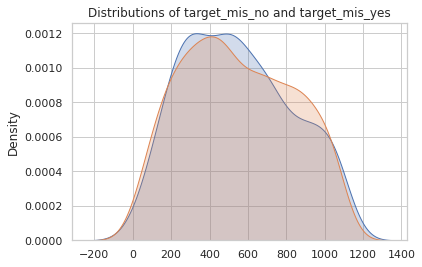

In [811]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(new_mis_tyes, shade=True)
sns.kdeplot(new_mis_tno, shade=True)
plt.title("Distributions of target_mis_no and target_mis_yes")
plt.show()

#### Demonstration of a-priori Power

In [812]:
from statsmodels.stats.power import TTestIndPower

# parameters for power analysis
effect_size = Cohens_d(new_mis_tno,new_mis_tyes)
alpha = 0.05
power = 0.8
ratio_ =1

print('Effect size is {0}'.format(effect_size))

analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size: %.3f' % sample_size)

Effect size is 0.0032407845055659437
Sample Size: 1494639.943


#### b）### T-test to prove supervision affects the time to reoffend people who was B Felony

In [813]:
new_BF_tyes = df_new[(df_new['Offense_Classification'] == 'B Felony') & (df_new['Target_Population'] == 'Yes')]['Days_to_Return'].to_list()
new_BF_tno = df_new[(df_new['Offense_Classification'] == 'B Felony') & (df_new['Target_Population'] == 'No')]['Days_to_Return'].to_list()
from scipy import stats
tStat, pValue = stats.ttest_ind(new_BF_tno,new_BF_tyes, equal_var = False) 
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic

P-Value:0.46757222136378584 T-Statistic:0.7291150188803518


#### Analysis of the distribution

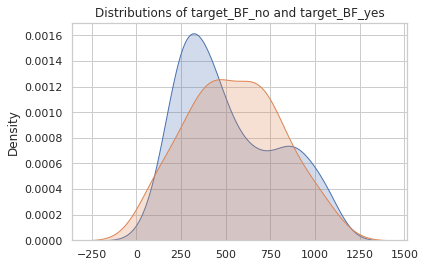

In [814]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(new_BF_tyes, shade=True)
sns.kdeplot(new_BF_tno, shade=True)
plt.title("Distributions of target_BF_no and target_BF_yes")
plt.show()

#### Demonstration of a-priori Power

In [815]:
from statsmodels.stats.power import TTestIndPower

# parameters for power analysis
effect_size = Cohens_d(new_BF_tno,new_BF_tyes)
alpha = 0.05
power = 0.8
ratio_ =1

print('Effect size is {0}'.format(effect_size))

analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size: %.3f' % sample_size)

Effect size is 0.09856376922784806
Sample Size: 1616.815


#### c）T-test to prove supervision affects the time to reoffend people who was C Felony

In [816]:
new_CF_tyes = df_new[(df_new['Offense_Classification'] == 'C Felony') & (df_new['Target_Population'] == 'Yes')]['Days_to_Return'].to_list()
new_CF_tno = df_new[(df_new['Offense_Classification'] == 'C Felony') & (df_new['Target_Population'] == 'No')]['Days_to_Return'].to_list()
from scipy import stats
tStat, pValue = stats.ttest_ind(new_CF_tno, new_CF_tyes, equal_var = False) 
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic

P-Value:0.23439502304769103 T-Statistic:1.1899047054487006


#### Analysis of the distribution

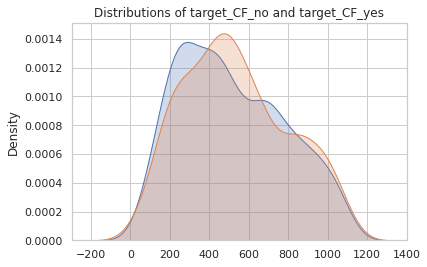

In [817]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(new_CF_tyes, shade=True)
sns.kdeplot(new_CF_tno, shade=True)
plt.title("Distributions of target_CF_no and target_CF_yes")
plt.show()

#### Demonstration of a-priori Power

In [818]:
from statsmodels.stats.power import TTestIndPower

# parameters for power analysis
effect_size = Cohens_d(new_CF_tno,new_CF_tyes)
alpha = 0.05
power = 0.8
ratio_ =1

print('Effect size is {0}'.format(effect_size))

analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size: %.3f' % sample_size)

Effect size is 0.07078756213731059
Sample Size: 3133.689


#### d)T-test to prove supervision affects the time to reoffend people who was D Felony

In [819]:
new_DF_tyes = df_new[(df_new['Offense_Classification'] == 'D Felony') & (df_new['Target_Population'] == 'Yes')]['Days_to_Return'].to_list()
new_DF_tno = df_new[(df_new['Offense_Classification'] == 'D Felony') & (df_new['Target_Population'] == 'No')]['Days_to_Return'].to_list()
from scipy import stats
tStat, pValue = stats.ttest_ind(new_DF_tyes, new_DF_tno, equal_var = False) 
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic

P-Value:0.017946934345192886 T-Statistic:-2.3688007608318813


#### Analysis of the distribution

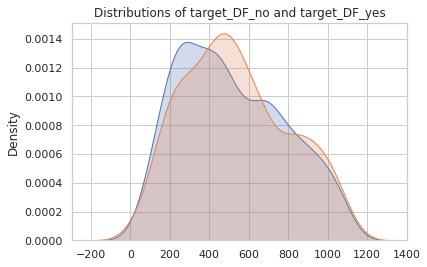

In [820]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(new_CF_tyes, shade=True)
sns.kdeplot(new_CF_tno, shade=True)
plt.title("Distributions of target_DF_no and target_DF_yes")
plt.show()

#### Demonstration of a-priori Power

In [821]:
from statsmodels.stats.power import TTestIndPower

# parameters for power analysis
effect_size = Cohens_d(new_DF_tno,new_DF_tyes)
alpha = 0.05
power = 0.8
ratio_ =1

print('Effect size is {0}'.format(effect_size))

analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size: %.3f' % sample_size)

Effect size is 0.10732011097681439
Sample Size: 1363.894


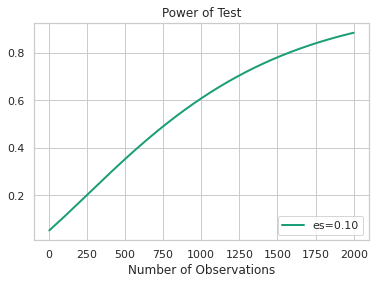

In [822]:
from numpy import array
from matplotlib import pyplot
from statsmodels.stats.power import TTestIndPower
# parameters for power analysis
effect_sizes = array([0.1])
sample_sizes = array(range(5, 2000))
# calculate power curves from multiple power analyses
analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
pyplot.show()

#### According to the T test analysis, only the D type had a significant difference in the monitoring effect while the Aggravated Misdemeanor type had no effect at all

## Qb Why are there differences return time between regulated areas ？Is it related to the distribution of the types of offenders? Different regulatory bureaus have different levels of oversight

In [823]:
df_mean_count_subtype_target = df_1.groupby(by=['Main_Supervising_District','Offense_Classification']).agg(['mean','count'])
display(df_mean_count_subtype_target)

Days_to_Return      
                                                           mean count
Main_Supervising_District Offense_Classification                     
1JD                       Aggravated Misdemeanor     546.912698   126
                          B Felony                   506.912281   114
                          C Felony                   455.535256   312
                          D Felony                   447.509383   373
2JD                       Aggravated Misdemeanor     498.610390    77
...                                                         ...   ...
8JD                       D Felony                   433.060748   214
NoSup                     Aggravated Misdemeanor     544.107256   634
                          B Felony                   579.896552    29
                          C Felony                   571.400749   267
                          D Felony                   561.705795   673

[36 rows x 2 columns]

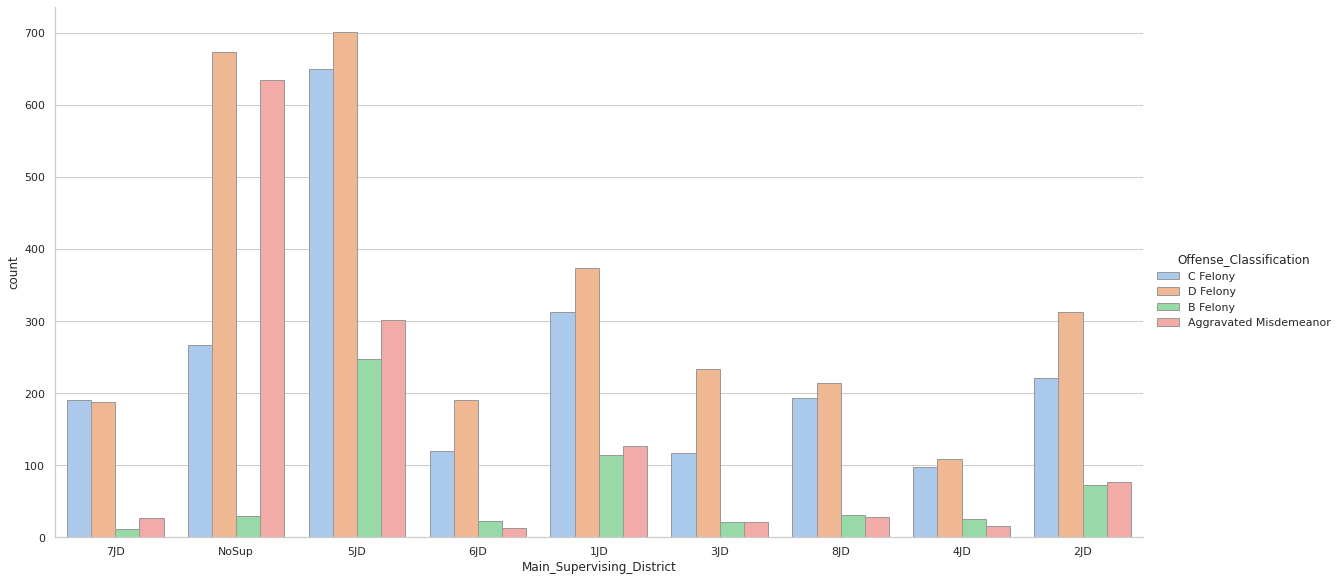

In [824]:
sns.catplot(x="Main_Supervising_District", hue="Offense_Classification", kind="count",height=8, aspect=2,
            palette="pastel", edgecolor=".6",
            data=df_1)

### chi square test 

In [825]:
from scipy import stats

table_sup_class = pd.crosstab(index=df_1['Main_Supervising_District'],columns=df_1['Offense_Classification'])
display(table_sup_class)


(chi2,p,dof,_) = stats.chi2_contingency([table_sup_class.iloc[0].values,table_sup_class.iloc[1].values])
print("chi2    : " ,chi2)
print("p-value : " ,p)
print("significance level : 0.05")

Offense_Classification     Aggravated Misdemeanor  B Felony  C Felony  \
Main_Supervising_District                                               
1JD                                           126       114       312   
2JD                                            77        72       221   
3JD                                            21        21       117   
4JD                                            15        26        98   
5JD                                           301       247       649   
6JD                                            13        23       120   
7JD                                            27        12       190   
8JD                                            28        31       193   
NoSup                                         634        29       267   

Offense_Classification     D Felony  
Main_Supervising_District            
1JD                             373  
2JD                             313  
3JD                             233  
4JD                             109  
5JD                             701  
6JD                             190  
7JD                             188  
8JD                             214  
NoSup                           673

chi2    :  5.80698321521211
p-value :  0.12138798339268496
significance level : 0.05


#### There's no correlation between the different Supervising_District and the different class of offenders

Text(0, 0.5, 'Mean of Days to Return')

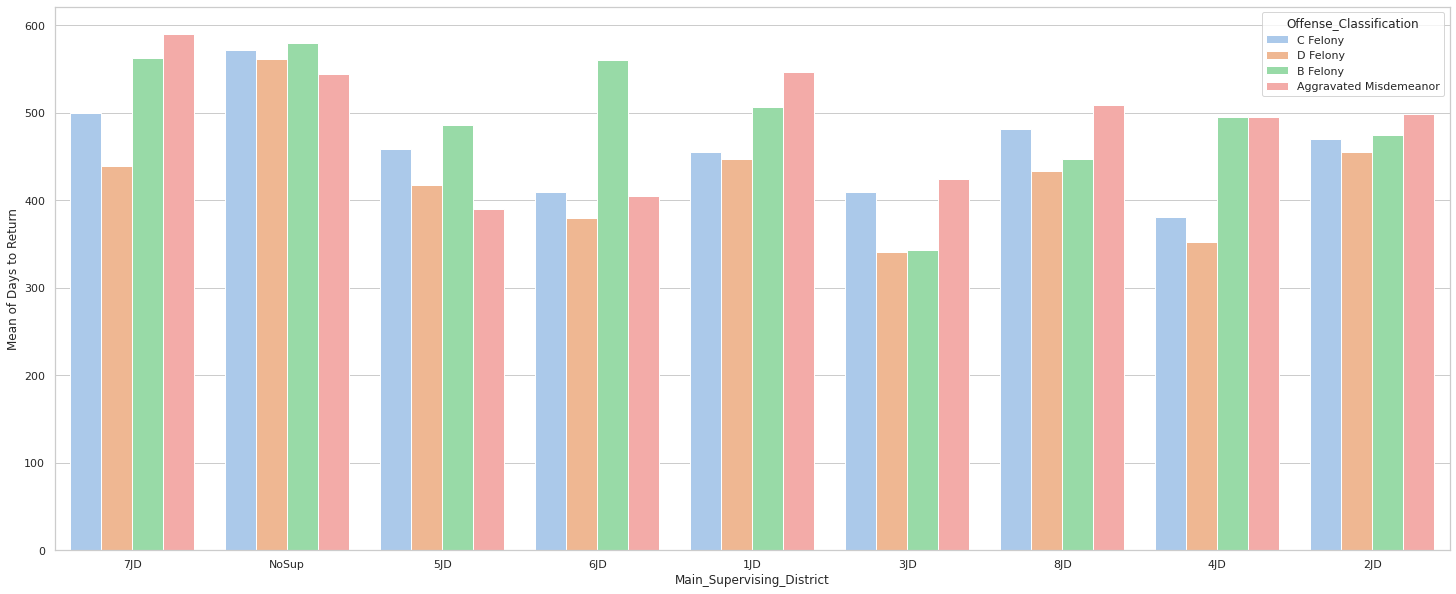

In [826]:
plt.figure(figsize=(25, 10))
sns.barplot(x="Main_Supervising_District",y="Days_to_Return",data=df_1, hue="Offense_Classification", palette="pastel", ci=0).set_ylabel('Mean of Days to Return')

#### Misdemeanor offenses in different custody areas back to prison time is significantly different

## TWO way ANOVA  &  Regression Analysis

In [827]:
# fit model to data to obtain parameter estimates
my_model_fit = smf.ols(formula='Days_to_Return ~ Main_Supervising_District * Offense_Classification', data=df_1).fit()
# print summary of linear regression
print(my_model_fit.summary())
# show anova table
print(sm.stats.anova_lm(my_model_fit, typ=2))

                            OLS Regression Results                            
Dep. Variable:         Days_to_Return   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     10.68
Date:                Thu, 08 Apr 2021   Prob (F-statistic):           1.46e-56
Time:                        16:06:42   Log-Likelihood:                -49038.
No. Observations:                6978   AIC:                         9.815e+04
Df Residuals:                    6942   BIC:                         9.839e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                                                                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [828]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
from scipy import stats

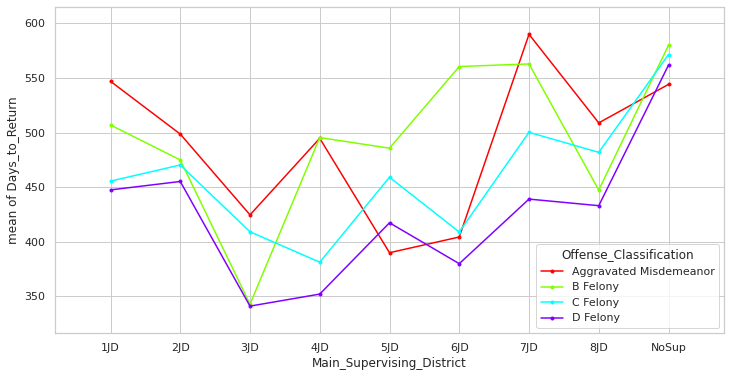

In [829]:
plt.figure(figsize=(12,6))
fig = interaction_plot(df_1.Main_Supervising_District,df_1.Offense_Classification,df_1.Days_to_Return, ax=plt.gca())
plt.show()

# Factorial-experiments

In [830]:
df_1_sup=df_1[df_1['Main_Supervising_District'] != 'NoSup']
import statsmodels.stats.multicomp as mc

interaction_groups = "Main_Supervising_District" + df_1_sup.Main_Supervising_District.astype(str) + " & " + "Offense_Classification" + df_1_sup.Offense_Classification.astype(str)

comp = mc.MultiComparison(df_1_sup["Days_to_Return"], interaction_groups)
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [831]:
table_int_mo = post_hoc_res.summary().as_html()
df_int_mo = pd.read_html(table_int_mo,header=0,index_col=None)[0]
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_rows', 10)
display(df_int_mo[df_int_mo['p-adj'] < 0.05])

group1  \
9    Main_Supervising_District1JD & Offense_Classif...   
10   Main_Supervising_District1JD & Offense_Classif...   
13   Main_Supervising_District1JD & Offense_Classif...   
14   Main_Supervising_District1JD & Offense_Classif...   
15   Main_Supervising_District1JD & Offense_Classif...   
..                                                 ...   
374  Main_Supervising_District4JD & Offense_Classif...   
376  Main_Supervising_District5JD & Offense_Classif...   
385  Main_Supervising_District5JD & Offense_Classif...   
396  Main_Supervising_District5JD & Offense_Classif...   
462  Main_Supervising_District6JD & Offense_Classif...   

                                                group2  meandiff   p-adj  \
9    Main_Supervising_District3JD & Offense_Classif... -137.7589  0.0287   
10   Main_Supervising_District3JD & Offense_Classif... -205.7882  0.0010   
13   Main_Supervising_District4JD & Offense_Classif... -165.5658  0.0028   
14   Main_Supervising_District4JD & Offense_Classif... -194.7751  0.0010   
15   Main_Supervising_District5JD & Offense_Classif... -156.8961  0.0010   
..                                                 ...       ...     ...   
374  Main_Supervising_District8JD & Offense_Classif...  129.7484  0.0250   
376  Main_Supervising_District5JD & Offense_Classif...   95.6797  0.0161   
385  Main_Supervising_District7JD & Offense_Classif...  110.2150  0.0052   
396  Main_Supervising_District6JD & Offense_Classif... -105.7174  0.0211   
462  Main_Supervising_District7JD & Offense_Classif...  120.2526  0.0069   

        lower     upper  reject  
9   -270.0093   -5.5084    True  
10  -319.6967  -91.8798    True  
13  -304.3045  -26.8270    True  
14  -329.5185  -60.0317    True  
15  -266.1954  -47.5968    True  
..        ...       ...     ...  
374    6.3289  253.1679    True  
376    7.2434  184.1161    True  
385   14.7701  205.6599    True  
396 -205.1177   -6.3171    True  
462   14.5684  225.9369    True  

[31 rows x 7 columns]